# Домашнее задание №7 по математической статистике

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df_original = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)

In [3]:
df_original.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
59416,City Hotel,1,286,2016,October,44,28,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,65.0,0,0,Canceled,2016-09-20
23339,Resort Hotel,0,0,2016,April,17,22,0,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,80.0,0,0,Check-Out,2016-04-23
9427,Resort Hotel,1,232,2016,November,48,26,2,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,11.0,NaN,0,Transient,30.0,0,0,Canceled,2016-10-18
4318,Resort Hotel,1,52,2016,March,10,4,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,48.0,0,1,No-Show,2016-03-04
87357,City Hotel,0,2,2016,April,16,16,2,1,2,0.0,0,BB,CHE,Direct,Direct,0,0,0,A,D,0,No Deposit,NaN,NaN,0,Transient,109.0,0,1,Check-Out,2016-04-19


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df_original.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df_original.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df_original.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


Преподготовка таблицы:
-  пустые значения в столбце children - 4 поля. Их можно заменить на значение 0
-  строки, в которых сумма  adults + children + babies == 0, такие строки можно просто удалить

In [87]:
# df_original.children.isna()
df_original[df_original.children.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [88]:
df = df_original.copy(deep=True)

In [89]:
df.children.fillna(0, inplace=True)

In [90]:
df[df.children.isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [91]:
df.shape

(119390, 32)

In [92]:
df.drop(df[
    (df.adults == 0) \
    & (df.children == 0) \
    & (df.babies == 0)
].index, inplace=True)

In [93]:
df.shape

(119210, 32)

In [94]:
df[(df.adults == 0) & (df.children == 0) & (df.babies == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


**Вопрос 1**  
Из какого города прибывает наибольшее количество гостей (по данным обоих отелей суммарно)?  
Дайте ответ названием страны из трех больших букв, также, как указано в данных

In [95]:
df.country.value_counts()

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
UMI        1
KIR        1
ATF        1
DMA        1
MMR        1
Name: country, Length: 177, dtype: int64

Ответ: 'PRT'

**Вопрос 2** 
Какая цена за одну ночь в каждом из отелей?

Ответ необходимо дать вне зависимости от типа номера, включенного питания. Также обратите внимание, что платящими пользователями мы считаем только взрослых и детей, младенцев необходимо исключить из расчета.

Ответ необходимо дать в формате в одну строку: Resort Hotel: 00.00, City Hotel: 00.00
- цену необходимо указать с точностью до двух знаков после запятой
- разделение долей может быть через точку или запятую
- наименования отелей в указанном формате, двоеточие и запятая обязательны для автоматического расчета ответа 

In [47]:
# Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [96]:
df['avg_adr'] = df.adr / (df.adults + df.children)  #/ (df.stays_in_weekend_nights + df.stays_in_week_nights) 

In [97]:
df[['hotel', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'adr', 'avg_adr']].sample(10)

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,adr,avg_adr
115911,City Hotel,1,2,2,0.0,146.67,73.335
60937,City Hotel,2,1,2,0.0,88.00,44.000
60823,City Hotel,0,2,1,0.0,83.60,83.600
27177,Resort Hotel,1,2,2,0.0,146.33,73.165
36442,Resort Hotel,0,2,1,0.0,95.50,95.500
107002,City Hotel,1,2,2,0.0,80.00,40.000
64277,City Hotel,3,7,2,0.0,100.30,50.150
28522,Resort Hotel,3,7,2,0.0,80.00,40.000
32018,Resort Hotel,0,1,1,0.0,68.00,68.000
65170,City Hotel,2,1,1,0.0,67.50,67.500


In [102]:
## было: Ответ: Resort Hotel: 48.57, City Hotel: 54.80
## где-то Чувилина говорила и про условие df.adr > 0. А позже не упомянула его

In [100]:
df[(df.is_canceled == 0) & (df.hotel == 'Resort Hotel')].avg_adr.mean()

47.48886565607789

In [101]:
df[(df.is_canceled == 0) & (df.hotel == 'City Hotel')].avg_adr.mean()

59.27298771446046

In [103]:
df[df.is_canceled == 0].groupby('hotel').avg_adr.agg('mean')

hotel
City Hotel      59.272988
Resort Hotel    47.488866
Name: avg_adr, dtype: float64

Ответ: Resort Hotel: 47.49, City Hotel: 59.27

**Вопрос 3**  
В какой сезон в обоих отелях меньше всего посетителей?
Необходимо дать текстовый ответ по примеру (начиная со строчной буквы): весна, зима, лето или осень

In [104]:
df['people'] = df[['adults', 'children', 'babies']].sum(axis=1)
df.people.head()

0    2.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: people, dtype: float64

In [107]:
df[df.is_canceled == 0].groupby('arrival_date_month').people.agg('sum').sort_values()

arrival_date_month
January       7186.0
November      8017.0
December      8492.0
February     10029.0
September    12068.0
March        12245.0
June         12520.0
October      12720.0
April        12833.0
May          13442.0
July         17317.0
August       19138.0
Name: people, dtype: float64

Ответ: зима

**Вопрос 4**  
Сколько ночей максимум остаются посетители в отеле Resort Hotel?

In [108]:
df[(df.hotel == 'Resort Hotel') & (df.stays_in_week_nights > 40) & (df.is_canceled == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,avg_adr,people
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,0.0,0,HB,NaN,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,110.5,0,3,Check-Out,2015-09-30,110.5,1.0
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,NaN,Direct,Direct,0,0,1,E,E,2,No Deposit,NaN,NaN,0,Transient,110.0,0,3,Check-Out,2016-09-12,110.0,1.0


In [110]:
df[(df.hotel == 'Resort Hotel') & (df.is_canceled == 0)]\
        [['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1).max()

69

Ответ: 69

**Вопрос 5**  
Сколько ночей максимум остаются посетители в отеле City Hotel?

In [112]:
df[(df.hotel == 'City Hotel') & (df.stays_in_week_nights > 20) & (df.is_canceled == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,avg_adr,people
54704,City Hotel,0,206,2016,July,30,23,14,34,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,K,6,No Deposit,9.0,NaN,0,Transient-Party,0.0,0,1,Check-Out,2016-09-09,0.0,2.0
103282,City Hotel,0,3,2016,November,47,14,9,25,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,3,No Deposit,NaN,368.0,0,Transient,93.0,0,0,Check-Out,2016-12-18,46.5,2.0


In [113]:
df[(df.hotel == 'City Hotel') & (df.is_canceled == 0)]\
        [['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1).max()

48

Ответ: 48

In [115]:
# а был 57

**Вопрос 6**  
Какой процент бронирований происходит online? (Online TA).  
Ответ необходимо дать с точностью до одного знака.

In [134]:
df_original.market_segment.value_counts(normalize=True) * 100

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

Ответ: 47.3

**Вопрос 7**  
Какой процент отмен бронирований в отеле Resort Hotel?  
Ответ необходимо дать целым числом.

In [117]:
# Чувилина сказала по reservation_status. Но потом стала говорить о is_canceled
df[df.hotel == 'Resort Hotel'].reservation_status.value_counts(normalize=True) * 100

Check-Out    72.232627
Canceled     27.040727
No-Show       0.726646
Name: reservation_status, dtype: float64

In [118]:
df[df.hotel == 'Resort Hotel'].is_canceled.value_counts(normalize=True) * 100
# канселед в этом столбце = канселед + ноу шоу в reservation_status

0    72.232627
1    27.767373
Name: is_canceled, dtype: float64

In [119]:
df_original[df_original.hotel == 'Resort Hotel'].is_canceled.value_counts(normalize=True) * 100

0    72.236645
1    27.763355
Name: is_canceled, dtype: float64

Ответ: 28

In [120]:
# а был 27

**Вопрос 8**  
В какой сезон самое большое количество отмен в Resort Hotel?  
Необходимо дать текстовый ответ: весна, зима, лето или осень

In [125]:
df[(df.is_canceled == 1) & (df.hotel == 'Resort Hotel')]\
        .groupby('arrival_date_month')\
        .agg('count')\
        .sort_values('is_canceled', ascending=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,avg_adr,people
arrival_date_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
August,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,1637,1636,1637,1637,1637,1637,1637,1637,1637,1637,1637,1538,8,1637,1637,1637,1637,1637,1637,1637,1637,1637
July,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436,1430,1436,1436,1436,1436,1436,1436,1436,1436,1436,1323,24,1436,1436,1436,1436,1436,1436,1436,1436,1436
April,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1059,1051,1059,1059,1059,1059,1059,1059,1059,1059,1059,926,36,1059,1059,1059,1059,1059,1059,1059,1059,1059
May,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,860,40,1024,1024,1024,1024,1024,1024,1024,1024,1024
June,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1006,1007,1007,1007,1007,1007,1007,1007,1007,1007,905,14,1007,1007,1007,1007,1007,1007,1007,1007,1007
September,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,1006,990,1006,1006,1006,1006,1006,1006,1006,1006,1006,831,104,1006,1006,1006,1006,1006,1006,1006,1006,1006
October,978,978,978,978,978,978,978,978,978,978,978,978,974,978,978,978,978,978,978,978,978,978,770,27,978,978,978,978,978,978,978,978,978
February,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,794,663,43,794,794,794,794,794,794,794,794,794
March,763,763,763,763,763,763,763,763,763,763,763,763,762,763,763,763,763,763,763,763,763,763,665,39,763,763,763,763,763,763,763,763,763


Ответ: лето

**Вопрос 9**  
В какой месяц было самое большое количество гостей в City Hotel?  
Название месяца со строчной буквы

In [129]:
df[(df.hotel == 'City Hotel') & (df.is_canceled == 0)]\
        .groupby('arrival_date_month')\
        .agg('sum')\
        .sort_values('people', ascending=False)['people']

arrival_date_month
August       11620.0
July         10266.0
May           8579.0
June          8396.0
April         8146.0
October       7927.0
September     7895.0
March         7634.0
February      5723.0
December      4707.0
November      4561.0
January       4002.0
Name: people, dtype: float64

Ответ: август

**Вопрос 10**  
Какой процент бронирований с типом питания BB (Bed&Breakfast) был сделан в City Hotel за все время?  
Ответ необходимо дать целым числом.

In [135]:
df[(df.hotel == 'City Hotel') & (df.is_canceled == 0)].meal.value_counts(normalize=True) * 100

BB    77.185140
SC    14.167607
HB     8.627723
FB     0.019530
Name: meal, dtype: float64

In [136]:
df_original[(df_original.hotel == 'City Hotel')].meal.value_counts(normalize=True) * 100

BB    78.539014
SC    13.316526
HB     8.088995
FB     0.055465
Name: meal, dtype: float64

In [132]:
df[(df.hotel == 'City Hotel')].meal.value_counts(normalize=True) * 100

BB    78.613746
SC    13.230929
HB     8.099744
FB     0.055582
Name: meal, dtype: float64

Ответ: 79

**Вопрос 11**  
(не по дата-сету)  
Андрей Озонов планирует заказать себе новые кроссовки и начать бегать. Вероятность того, что нужный товар доставят из магазина A, равна 0,85. Вероятность того, что этот товар доставят из магазина B, равна 0,90. Андрей Озонов заказал кроссовки сразу в обоих магазинах. Считая, что интернет-магазины работают независимо друг от друга, найдите вероятность того, что ни один магазин не доставит товар.  
Ответ необходимо дать в процентах с точностью до одного знака.

In [37]:
(1 - 0.85) * (1 - 0.9) * 100

1.5

Ответ: 1,5

**Вопрос 12** 
(не по дата-сету)  
В таблице нижепредставлены данные о товарообороте компаний в месяц. Необходимо определить: 
- средний размер месячного товарооборота на одну фирму
- моду и 
- медиану месячного товарооборота
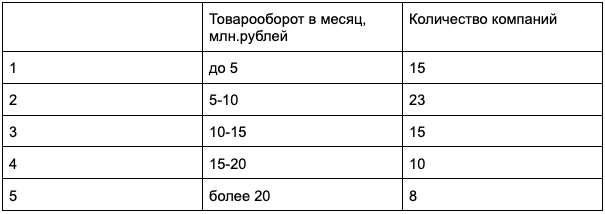

ответ надо было выбрать из предложенных вариантов
Ответ: 10,6, 7,5, 9,5

**Вопрос 13**  
(дополнительный вопрос без присвоения балла)  
Ниже дан график по данным о поездках на такси в районах Нью-Йорка. По оси X - название района, по оси Y - общая сумма чека. 
Проанализируйте график и напишите свои выводы в свободном формате. На занятии мы обсудим какие выводы можно сделать из этого графика:)  
Выпишите ответ себе в заметки, чтобы сверить свои выводы на занятии. 
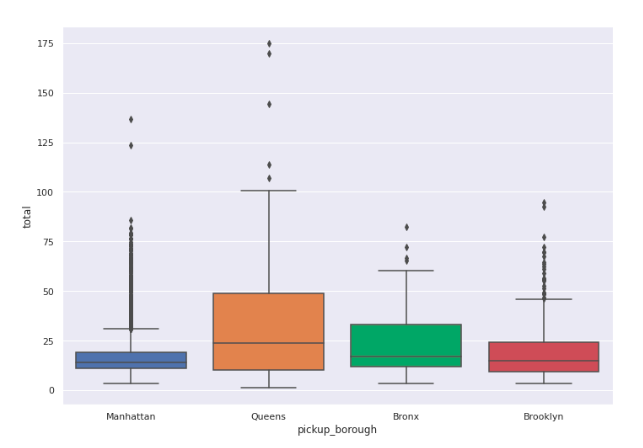

Если люди приезжают на такси на работу и уезжают на такси домой, то не должно быть распределение более равномерным? Распределения больше говорят о перемещении внутри района?  
В манхэттене и бруклине есть метро. В бронкс и квинз только концы веток доходят на окраинах районов. Это довлеющий фактор?  
Манхэтенцы - "белая кость", предпочитают жить и работать недалеко? Или метро решает?  
Квинз то ли большой, то ли ездит часто далеко. Спальный район "белых воротничков"? На работу срочно на такси, а возвращаются на электричках? Или внутри района ездят, за отсутствием метро?  

In [5]:
dct = {1: 7, 2: 5, 3: 6}
dct

{1: 7, 2: 5, 3: 6}

In [6]:
dct[1] = 8
dct

{1: 8, 2: 5, 3: 6}

In [7]:
dct.pop(1)
dct

{2: 5, 3: 6}

In [8]:
dct[1] = 8
dct

{2: 5, 3: 6, 1: 8}

In [ ]:
PRT
Resort Hotel: 48.57, City Hotel: 54.80
зима
69
57
47,3
27
лето
август
79
1,5
10,6, 7,5, 9,5